<a href="https://colab.research.google.com/github/Anuj-1996/Indian-Market-Volatility/blob/main/Nifty_Volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance


     |████████████████████████████████| 6.3 MB 6.4 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
pip install arch

     |████████████████████████████████| 902 kB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 32.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import yfinance as yf
from arch.__future__ import reindexing

start = '2020-12-08'
end = datetime.today().strftime('%Y-%m-%d')
N50 = yf.download("^NSEI", start= start, end = end) 
#^INDIAVIX  


[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'N50 Returns')

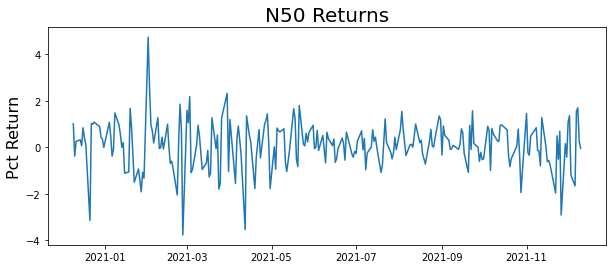

In [ ]:
returns = 100 * N50.Close.pct_change().dropna()
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('N50 Returns', fontsize=20)

### **PACF**

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


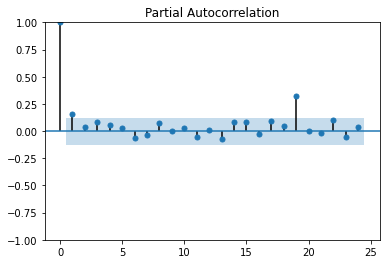

In [ ]:
plot_pacf(returns**2)
plt.show()

## **GARCH 1,1**

In [ ]:
model = arch_model(returns, p=1, q=0)
model_fit = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 358.2816105468229
Iteration:      2,   Func. Count:     14,   Neg. LLF: 347.3428833214241
Iteration:      3,   Func. Count:     22,   Neg. LLF: 346.00047621386415
Iteration:      4,   Func. Count:     28,   Neg. LLF: 345.9730623412208
Iteration:      5,   Func. Count:     34,   Neg. LLF: 345.8912704689545
Iteration:      6,   Func. Count:     39,   Neg. LLF: 345.87918440893554
Iteration:      7,   Func. Count:     44,   Neg. LLF: 345.87579045193655
Iteration:      8,   Func. Count:     49,   Neg. LLF: 345.87578440962125
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 345.8757844096339
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -345.876
Distribution:                  Normal   AIC:                           697.752
Method:            Maximum Likelihood   BIC:                           708.292
                                        No. Observations:                  248
Date:                Mon, Dec 13 2021   Df Residuals:                      247
Time:                        08:42:19   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1083  6.945e-02      1.559      0.119 [-2.784e-02,  0.244]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.7932      0.176      4.509  6.524e-06 [  0.448,  1.138]
alpha[1]       0.2116      0.206      1.028      0.304 [ -0.192,  0.615]
========================================================================

Covariance estimator: robust
"""

In [ ]:
rolling_predictions = []
test_size = 120

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1, reindex=True)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [ ]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-120:])

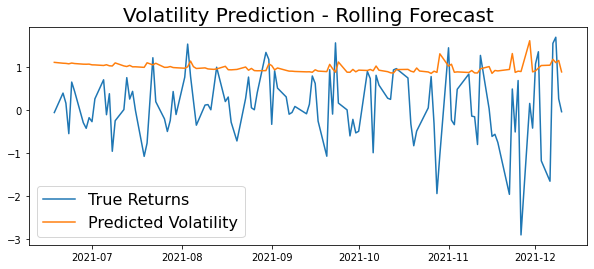

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-120:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

## **NXT 7 DAYS**

In [ ]:
train = returns
model = arch_model(train, p=1, q=0)
model_fit = model.fit(disp='off')

In [ ]:
pred = model_fit.forecast(horizon=7, reindex=True)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,6)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 5 Days')

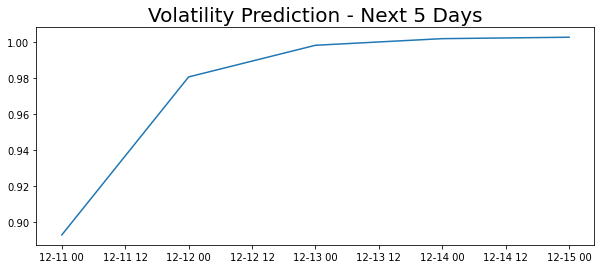

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)